In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#Load DatA
df = pd.read_csv('encoded_car_data (1).csv')
print(df.head())

   diesel  gas  std  turbo  convertible  hardtop  hatchback  sedan  wagon  \
0     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
1     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
2     0.0  1.0  1.0    0.0          0.0      0.0        1.0    0.0    0.0   
3     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   
4     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   

   4wd  ...  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
1  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
2  0.0  ...       94.5      2823.0       152.0       2.68       154.0   
3  0.0  ...       99.8      2337.0       109.0       3.19       102.0   
4  1.0  ...       99.4      2824.0       136.0       3.19       115.0   

   carlength  carwidth  citympg  highwaympg    price  
0      168.8      64.1     21.0        27.0

In [3]:
#SELECT FEATURES AND Target
X=df[['enginesize','horsepower','citympg','highwaympg']]
Y=df['price']

In [4]:
#Split DatA
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
#1,LINEAR REGRESSION(WITH SCALING)
lr = Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])
lr.fit(X_train,Y_train)
y_pred_linear=lr.predict(X_test)

#2 POLYNOMIAL REGRESSION(D=2)
poly_model=Pipeline([
   ('poly' PolynomialFeatures(degree=2)),
   ('scaler', StandardScaler())

In [6]:
#2 POLYNOMIAL REGRE(D=2)
poly_model= Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_model.fit(X_train,Y_train)
y_pred_poly=poly_model.predict(X_test)

In [7]:
#EVALUATE MODELS
print('Name: POOJA U ')
print('Reg. No: 212225230209')
print("LinearRegression:")
# mse=mean_squared_error(Y_test,Y_pred_linear)
mean_absolute_error(Y_test,y_pred_linear)
print('MAE=',mean_absolute_error(Y_test,y_pred_linear))
print('MSE=',mean_squared_error(Y_test,y_pred_linear))
r2score=r2_score(Y_test,y_pred_linear)
print('R2 Score=',r2score)

Name: POOJA U 
Reg. No: 212225230209
LinearRegression:
MAE= 2892.628134137953
MSE= 16471505.900042146
R2 Score= 0.7913520781370976


In [8]:
print("\nPolynomial Regression: ")
print("MSE: {mean_squared_error(Y_test,y_pred_poly):.2f}")
print("MAE: {r2_score(Y-test, y_pred_poly):.2f}")


Polynomial Regression: 
MSE: {mean_squared_error(Y_test,y_pred_poly):.2f}
MAE: {r2_score(Y-test, y_pred_poly):.2f}


<function matplotlib.pyplot.show(close=None, block=None)>

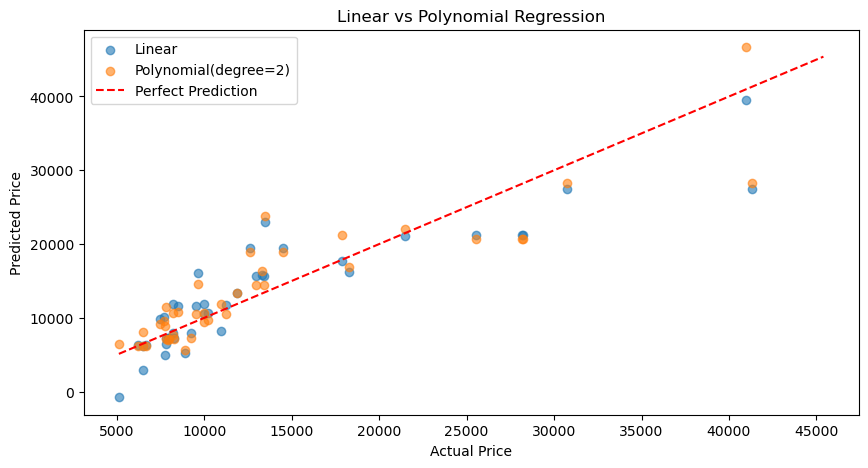

In [9]:
#Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred_linear,label='Linear',alpha=0.6)
plt.scatter(Y_test,y_pred_poly, label='Polynomial(degree=2)',alpha=0.6)
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--',label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show